# Assignments: Househunters

**Introduction**

HouseHunters is a website advertising houses. Currently, several real estate agencies offer the houses that are sold through their office. In the future, HouseHunters wants to be a platform for private sellers as well. As the asking price generally is different from the value of a house, HouseHunters wants to give private sellers an indication of the asking price of their house according to asked prices of sold houses in the past. Sellers can take this into account when deciding on their selling price.

**Assignments**

HouseHunters wants to accurately predict housing prices and be able to understand which characteristics drive the price of a house. In order to do this you will use different modeling techniques. After each theoretical part about a modeling technique, you will apply this technique on the househunters data. The first of the script is about loading data, exploring the data etc. Go through this part quickly to understand what is happening. You might have to change the directory from which the data is looaded, or change the file filename. The assignments start from the header 'Assignment 1: Linear Regression'. 

Part of the code where you have to fill in something are marked with three dots ...

## Install packages and load data

In [148]:
# a) Install packages

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd       # 'as' := we abbreviate the package for common use
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import random
import os
import math
import matplotlib.pyplot as plt 
import datetime
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import xgboost as xgb

from sklearn.linear_model import LogisticRegression #Logistic regression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn import metrics #ROC curve

In [149]:
# Define function for the MAPE

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [150]:
# b) Load data

# change directory if necessary
inputdata = pd.read_csv("190322 - HouseTable_vDef_excel.csv", delimiter=',')

#    Get an overview of the data
inputdata.head(10)
inputdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667 entries, 0 to 3666
Data columns (total 30 columns):
ID                                           3667 non-null int64
Price                                        3667 non-null int64
Province                                     3667 non-null object
HouseType                                    3667 non-null object
ConstructionYear                             3667 non-null int64
CapacityHouse_m3                             3667 non-null float64
LivingArea_m2                                3667 non-null float64
ResidentialNeighborhood                      3667 non-null int64
QuietRoad                                    3667 non-null int64
Garden                                       2716 non-null float64
FirePlace                                    3667 non-null int64
Balcony                                      3667 non-null int64
Attic                                        3667 non-null int64
Back                                    

## Data exploration

#### Variable exploration

In [151]:
# a) Get an overview of the data
#    Get the number of rows and columns
print('(nrow, ncol):', inputdata.shape)     

#    Show a brief summary of the numeric variables
inputdata.describe()                        # min/max, count, mean, std and percentiles

(nrow, ncol): (3667, 30)


,ID,Price,ConstructionYear,CapacityHouse_m3,LivingArea_m2,ResidentialNeighborhood,QuietRoad,Garden,FirePlace,Balcony,...,Num_WWB,Num_AO,Num_WW,Num_AOW,Municipality_Distance_hospital_km,Municipality_Distance_childDaycare_km,Municipality_Distance_largeSupermarket_km,Municipality_Distance_trainstation_km,Avg_WOZ_m2,Garden_validation
count,3.667000e+03,3.667000e+03,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,2716.000000,3667.000000,3667.000000,...,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000
mean,2.683852e+06,3.355942e+05,1968.374966,475.626872,132.150935,0.209163,0.186528,0.663476,0.035724,0.136079,...,238.581947,357.837469,210.452686,1327.043905,7.835042,0.824407,0.944151,6.586474,1803.535485,0.647668
std,1.058421e+04,1.633092e+05,35.014865,264.924015,58.871407,0.406766,0.389586,0.472608,0.185627,0.342919,...,288.817701,231.142913,132.369864,813.035900,6.200927,0.443916,0.369759,9.093516,529.434670,0.477762
min,2.250795e+06,-1.750700e+04,1816.000000,68.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.500000,0.400000,0.500000,1.000000,800.000000,0.000000
25%,2.681245e+06,2.212085e+05,1955.000000,322.000000,96.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,60.000000,180.000000,110.000000,670.000000,3.300000,0.500000,0.700000,2.400000,1500.000000,0.000000
50%,2.684540e+06,3.006830e+05,1975.000000,406.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,150.000000,330.000000,200.000000,1260.000000,5.700000,0.700000,0.900000,3.000000,1700.000000,1.000000
75%,2.687806e+06,4.113925e+05,1994.500000,544.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,300.000000,500.000000,290.000000,1870.000000,11.400000,1.000000,1.100000,7.300000,2000.000000,1.000000
max,2.693785e+06,1.594992e+06,2019.000000,1653.900000,384.030000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2720.000000,1510.000000,900.000000,5160.000000,63.700000,6.300000,2.600000,50.700000,5350.000000,1.000000


In [152]:
# b) Check data type of each variable
print(pd.DataFrame(inputdata.dtypes, columns=['Datatype']))

                                          Datatype
ID                                           int64
Price                                        int64
Province                                    object
HouseType                                   object
ConstructionYear                             int64
CapacityHouse_m3                           float64
LivingArea_m2                              float64
ResidentialNeighborhood                      int64
QuietRoad                                    int64
Garden                                     float64
FirePlace                                    int64
Balcony                                      int64
Attic                                        int64
Back                                         int64
#Bedrooms                                    int64
StatusRank                                   int64
StatusScore                                float64
Urbanity_class                               int64
Avg_house_value_WOZ_1000euros  

In [153]:
# c) Get an overview of the NULLS in the dataset
nulls = pd.DataFrame(inputdata.isnull().sum(), columns=['# NULLS'])        # Number of NULLS 

lst={}                                                                     # Number of NULLS as a percentage
for col in inputdata.columns:                                       
    lst[col]=np.sum(inputdata.loc[:,col].isnull())/len(inputdata.loc[:,col])
percNulls = pd.DataFrame(pd.Series(lst), columns=['% NULLS'])

print(pd.concat([nulls, percNulls], axis=1))

                                           # NULLS  % NULLS
ID                                               0  0.00000
Price                                            0  0.00000
Province                                         0  0.00000
HouseType                                        0  0.00000
ConstructionYear                                 0  0.00000
CapacityHouse_m3                                 0  0.00000
LivingArea_m2                                    0  0.00000
ResidentialNeighborhood                          0  0.00000
QuietRoad                                        0  0.00000
Garden                                         951  0.25934
FirePlace                                        0  0.00000
Balcony                                          0  0.00000
Attic                                            0  0.00000
Back                                             0  0.00000
#Bedrooms                                        0  0.00000
StatusRank                              

Text(0, 0.5, '#')

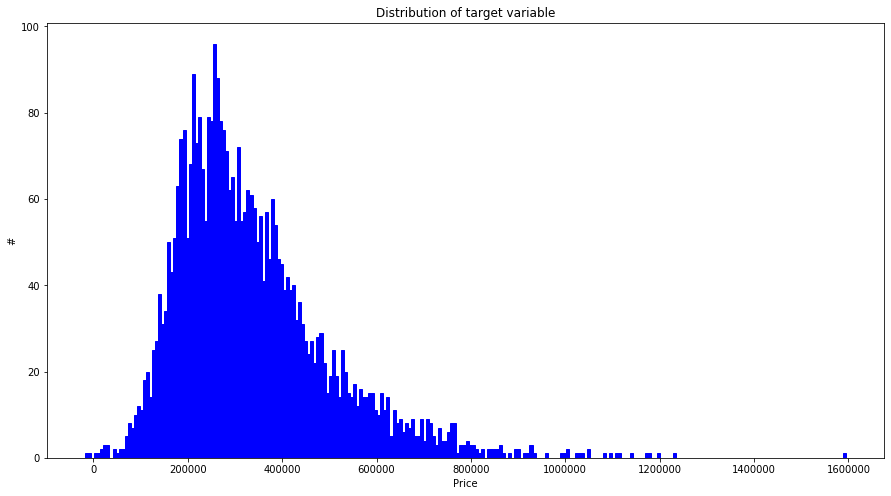

In [154]:
# d) Plot distribution of target variable
target = 'Price'

plt.figure(figsize=(15,8))
plt.hist((inputdata[target]), bins=250, color = 'blue', edgecolor = 'blue')
plt.title('Distribution of target variable')
plt.xlabel(target)
plt.ylabel('#')

#### Explore relations with target variable 'Price'

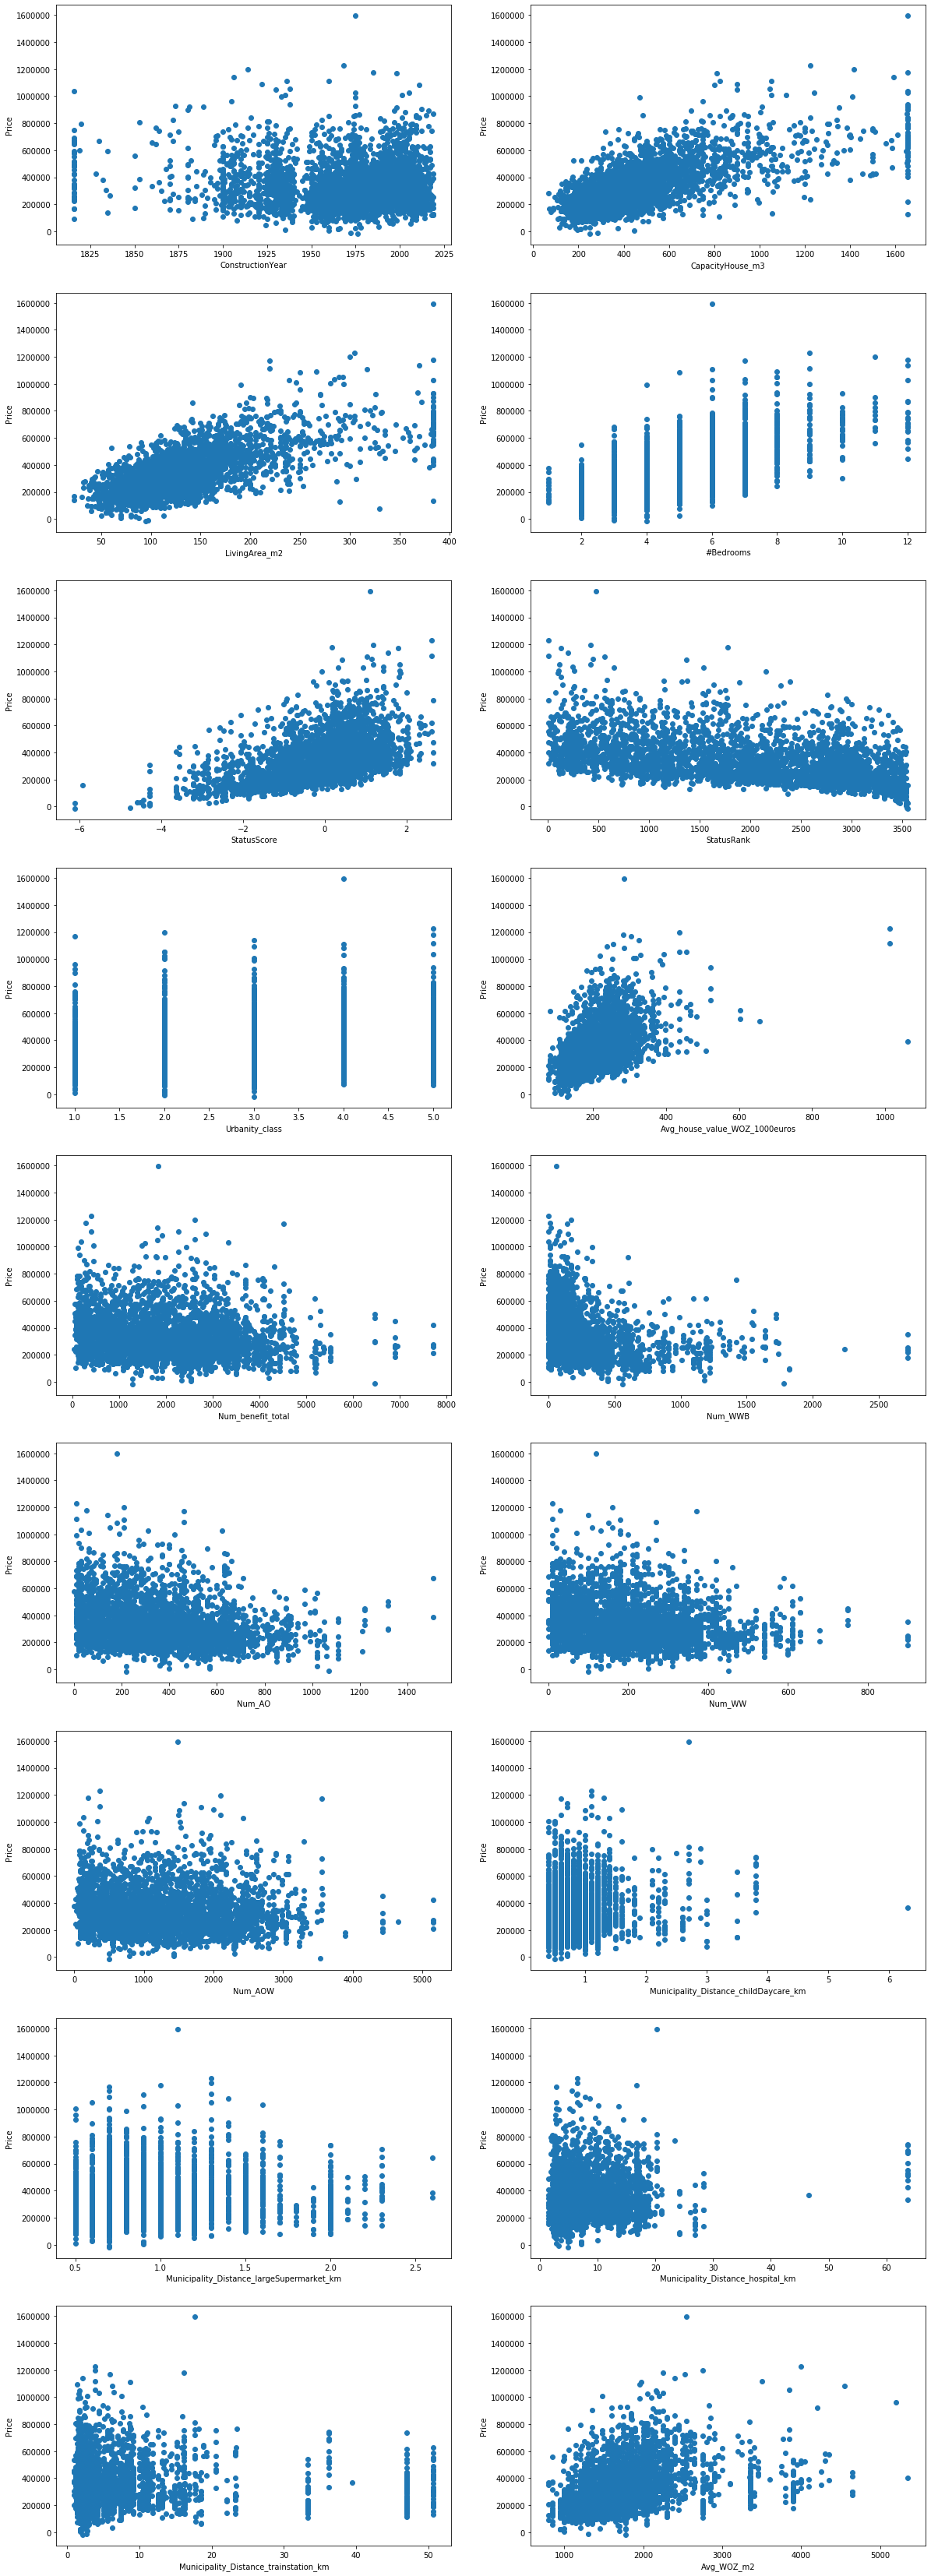

In [155]:
# e) Create scatter plot to see the relation between numerical (not dummy) variables and target variable
numericals = ['ConstructionYear'
              ,'CapacityHouse_m3'
              ,'LivingArea_m2'
              ,'#Bedrooms'
              ,'StatusScore'
              ,'StatusRank'
              ,'Urbanity_class'
              ,'Avg_house_value_WOZ_1000euros'
              ,'Num_benefit_total'
              ,'Num_WWB'
              ,'Num_AO'
              ,'Num_WW'
              ,'Num_AOW'
              ,'Municipality_Distance_childDaycare_km'
              ,'Municipality_Distance_largeSupermarket_km'
              ,'Municipality_Distance_hospital_km'
              ,'Municipality_Distance_trainstation_km'
              ,'Avg_WOZ_m2'
             ]  
target = 'Price'


plt.figure(figsize=(20,60))
for i, column in enumerate(numericals):
    plt.subplot(math.ceil(len(numericals)/2), 2, i+1)
    x = inputdata[column]
    y = inputdata[target]
    plt.scatter(x, y, marker='o', cmap='blue')
    plt.xlabel(column)
    plt.ylabel('Price')

In [307]:
split_points = [100,200,300,400,500]
split_len = 500
print(len(inputdata))
analysis_set = inputdata
for i in range(0,5):
    print("Group: {}-{}".format(i*split_len, (i+1)*split_len))
    print("size: {}".format(len(analysis_set.loc[((analysis_set.Num_benefit_total >= i*split_len) 
                                                      & (analysis_set.Num_benefit_total < (i+1)*split_len)), target])))

    print("avg all: {}".format(np.mean(analysis_set.loc[((analysis_set.Num_benefit_total >= i*split_len) 
                                                      & (analysis_set.Num_benefit_total < (i+1)*split_len)), target])))
    print("avg ex: {}".format(np.mean(analysis_set.loc[(((analysis_set.Num_benefit_total-analysis_set.Num_AOW) >= i*split_len) 
                                                     & ((analysis_set.Num_benefit_total-analysis_set.Num_AOW) < (i+1)*split_len)), target])))
#     print("avg Ex AOW: {}".format())

# analysis_set = inputdata.loc[inputdata.Urbanity_class>3,:]
# for i in range(0,10):
#     print("Group: {}-{}".format(i*100, (i+1)*100))
#     print("size: {}".format(len(analysis_set.loc[((analysis_set.Num_benefit_total >= i*100) 
#                                                       & (analysis_set.Num_benefit_total < (i+1)*100)), target])))
#     print("avg all: {}".format(np.mean(analysis_set.loc[((analysis_set.Num_benefit_total >= i*100) 
#                                                       & (analysis_set.Num_benefit_total < (i+1)*100)), target])))
#     print("avg ex: {}".format(np.mean(analysis_set.loc[(((analysis_set.Num_benefit_total-analysis_set.Num_AOW) >= i*100) 
#                                                      & ((analysis_set.Num_benefit_total-analysis_set.Num_AOW) < (i+1)*100)), target])))


3664
Group: 0-500
size: 403
avg all: 411578.3523573201
avg ex: 386727.1491712707
Group: 500-1000
size: 426
avg all: 352472.60328638495
avg ex: 333515.8935698448
Group: 1000-1500
size: 423
avg all: 341561.8605200946
avg ex: 283671.4174894217
Group: 1500-2000
size: 537
avg all: 346384.87709497206
avg ex: 256351.94581280788
Group: 2000-2500
size: 485
avg all: 316812.006185567
avg ex: 248652.87234042553


In [396]:
analysis_set = inputdata

analysis_set['num_nearby'] = (analysis_set['Municipality_Distance_childDaycare_km'] < 1)*1.0 + (analysis_set['Municipality_Distance_largeSupermarket_km'] < 1) + (analysis_set['Municipality_Distance_hospital_km'] < 10) + (analysis_set['Municipality_Distance_trainstation_km'] < 10)

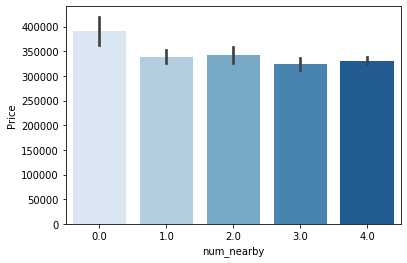

In [397]:
sns.barplot(inputdata['num_nearby'], inputdata[target], palette='Blues')

Text(0, 0.5, 'Price')

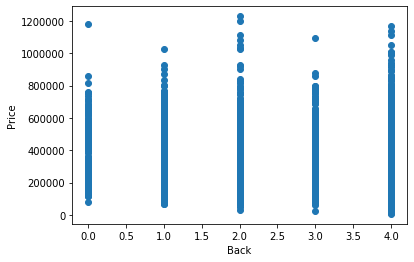

In [221]:
x = inputdata['num_nearby']
y = inputdata[target]
plt.scatter(x, y, marker='o', cmap='blue')
plt.xlabel(column)
plt.ylabel('Price')

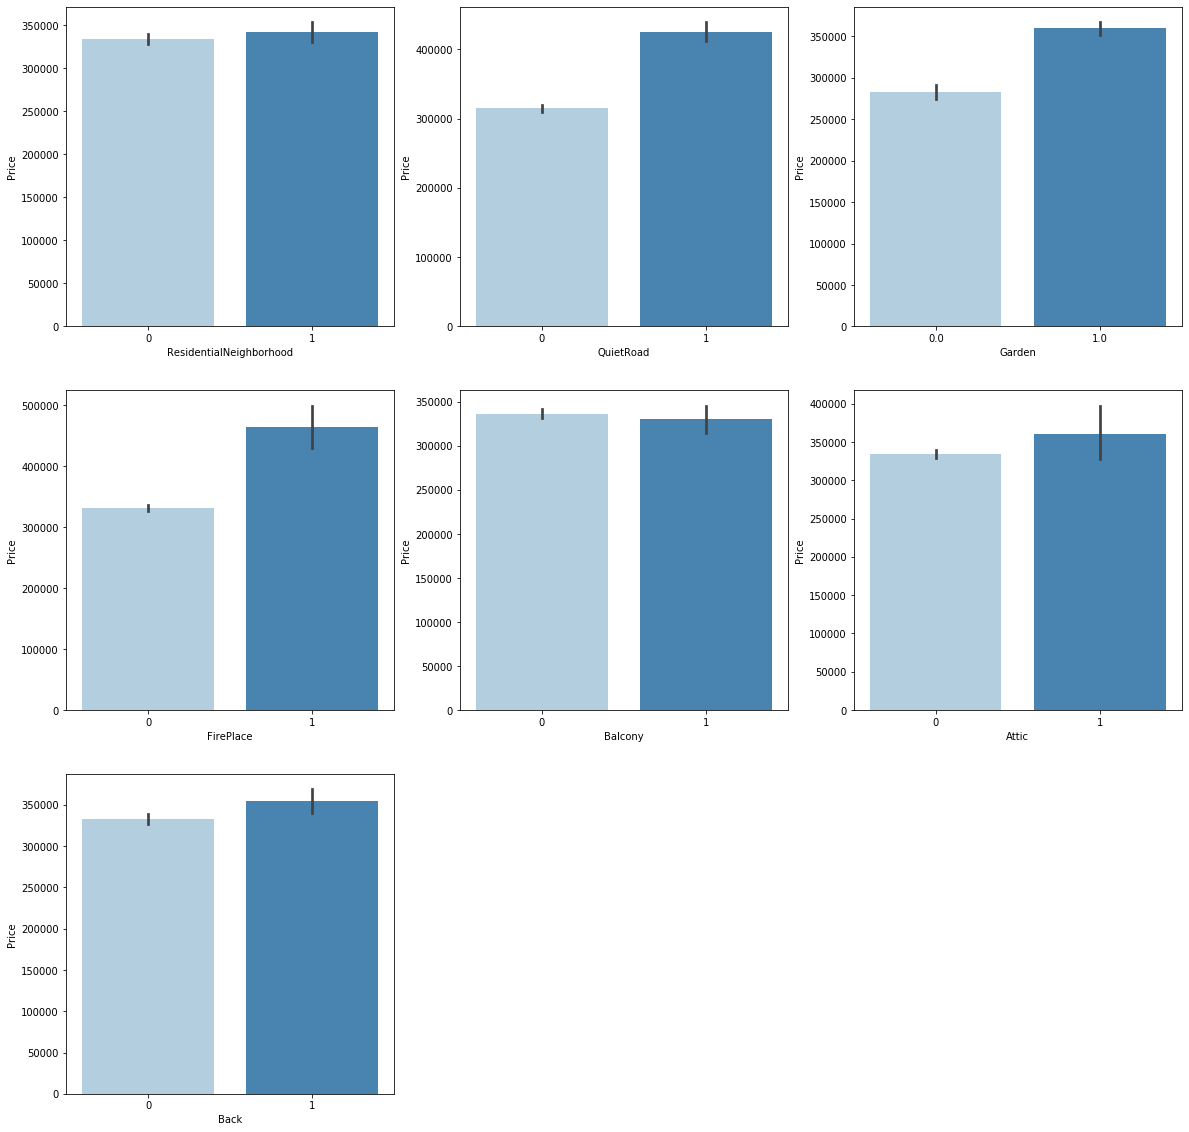

In [157]:
# f) Create barplot to see the relation between the dummy-variables and target variable
dummies = ['ResidentialNeighborhood'
           ,'QuietRoad'
           ,'Garden'
           ,'FirePlace'
           ,'Balcony'
           ,'Attic'
           ,'Back'
          ]


plt.figure(figsize=(20,20))
for i, column in enumerate(dummies):
    plt.subplot(math.ceil(len(dummies)/3), 3, i+1)
    sns.barplot(inputdata[column], inputdata[target], palette='Blues')

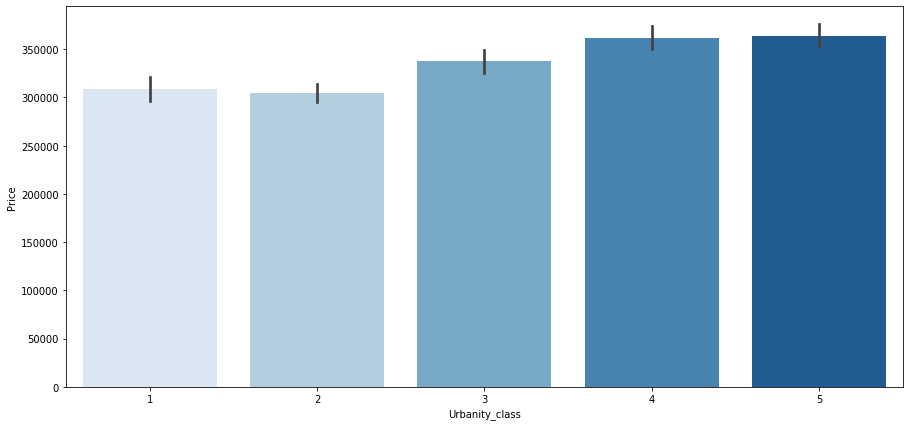

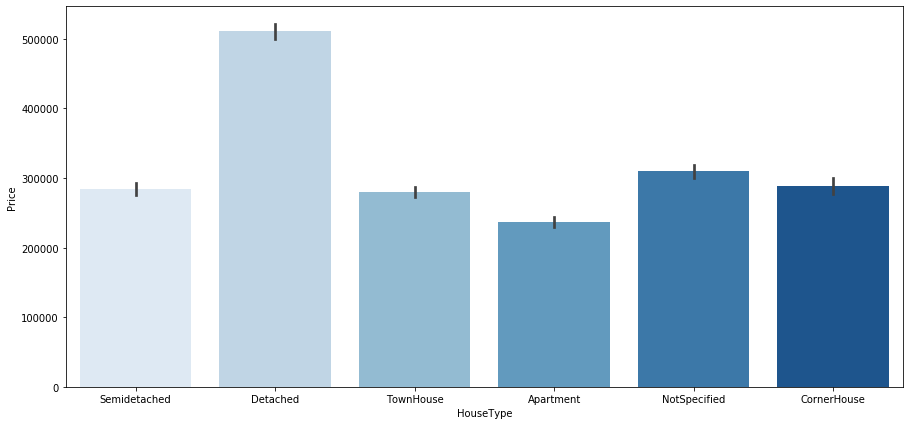

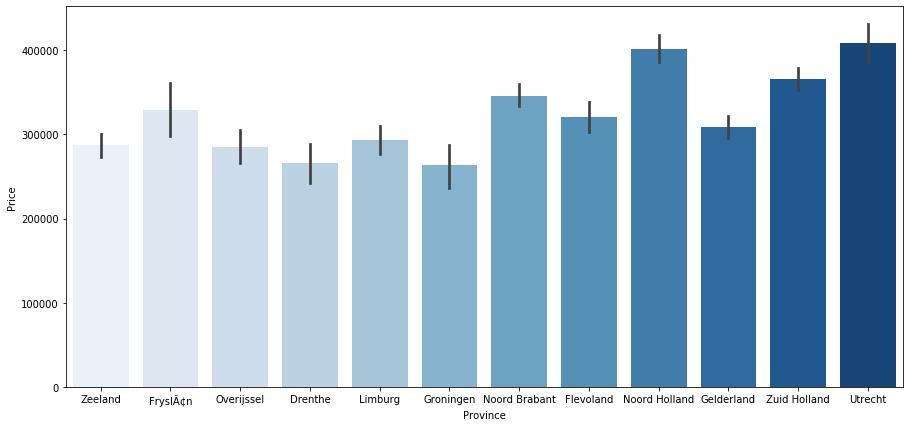

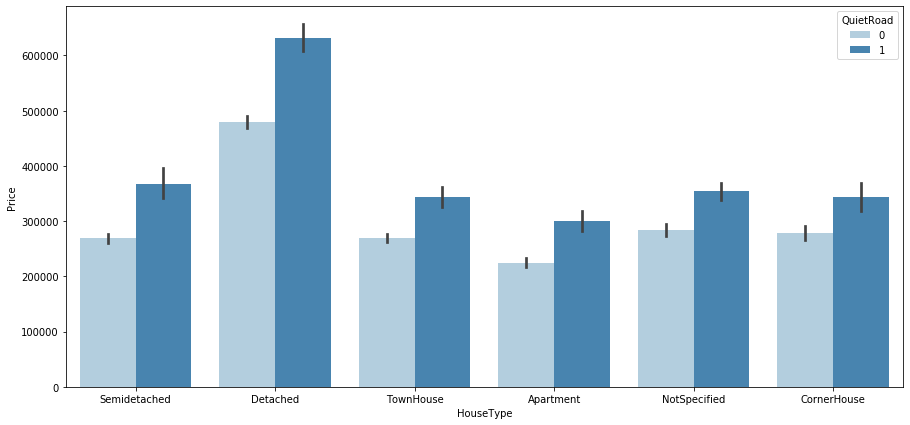

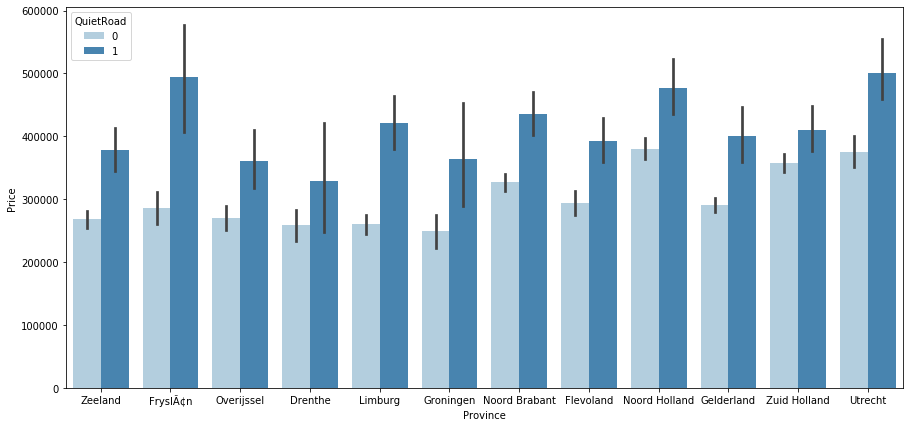

<Figure size 1080x504 with 0 Axes>

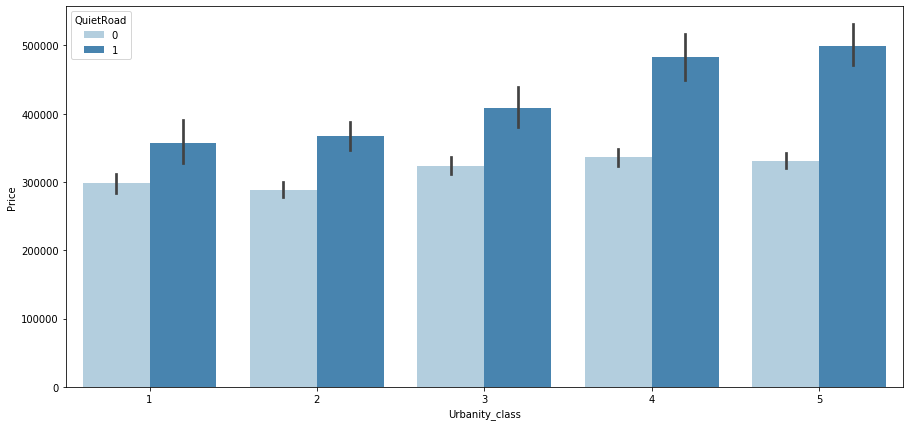

In [393]:
# g) Create barplot to see the relation between the categorical variables and the target variable
plt.figure(figsize=(15,7))
sns.barplot(inputdata['Urbanity_class'],inputdata[target], palette='Blues')
plt.figure(figsize=(15,7))
sns.barplot(inputdata['HouseType'],inputdata[target], palette='Blues')
plt.figure(figsize=(15,7))
sns.barplot(inputdata['Province'],inputdata[target], palette='Blues')

#   Here you can include additional variables to explore
plt.figure(figsize=(15,7))
sns.barplot(inputdata['HouseType'],inputdata[target],inputdata['QuietRoad'], palette='Blues')
plt.figure(figsize=(15,7))
sns.barplot(inputdata['Province'],inputdata[target],inputdata['QuietRoad'], palette='Blues')
plt.figure(figsize=(15,7))
plt.figure(figsize=(15,7))
sns.barplot(inputdata['Urbanity_class'],inputdata[target],inputdata['QuietRoad'], palette='Blues')

In [159]:
# h) Print correlation with the target variable
corrmat = inputdata.corr().round(2)
print(corrmat["Price"].sort_values(ascending=False))

Price                                        1.00
LivingArea_m2                                0.69
CapacityHouse_m3                             0.67
#Bedrooms                                    0.62
Avg_house_value_WOZ_1000euros                0.51
StatusScore                                  0.49
Avg_WOZ_m2                                   0.32
QuietRoad                                    0.26
Garden_validation                            0.24
Garden                                       0.23
FirePlace                                    0.15
Urbanity_class                               0.15
Municipality_Distance_childDaycare_km        0.11
Municipality_Distance_hospital_km            0.09
Municipality_Distance_largeSupermarket_km    0.04
Back                                         0.04
Municipality_Distance_trainstation_km        0.03
Attic                                        0.03
ResidentialNeighborhood                      0.02
ID                                          -0.01


In [160]:
#    Show correlation matrix to look for mutual correlations
columns = ['Price'
          # ,'ConstructionYear'
           ,'CapacityHouse_m3'
           ,'LivingArea_m2'
          # ,'ResidentialNeighborhood'
           ,'QuietRoad'
           ,'Garden'
           ,'FirePlace'
           ,'Balcony'
          # ,'Attic'
          # ,'Back'
           ,'#Bedrooms'
           ,'StatusRank'
           ,'StatusScore'
           ,'Urbanity_class'
           ,'Avg_house_value_WOZ_1000euros'
          ,'Num_benefit_total'
           ,'Num_WWB'
           ,'Num_AO'
           ,'Num_WW'
          ,'Num_AOW'
          ,'Municipality_Distance_hospital_km'
           ,'Municipality_Distance_childDaycare_km'
          ,'Municipality_Distance_largeSupermarket_km'
          ,'Municipality_Distance_trainstation_km'
           ,'Avg_WOZ_m2'
           ,'good_hood'
          ]

correlation = inputdata[columns]
corrmat = correlation.corr().round(2)
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(corrmat, square=True, annot=True)

KeyError: "['good_hood'] not in index"

## Data preparation

In [161]:
print(inputdata.shape)

(3667, 30)


In [162]:
# a) Drop rows with a price <= 2000, as these are probably for rent, and price >= 1.500.000, as these are outliers

inputdata = inputdata[~(inputdata['Price']<=3000)]
inputdata = inputdata[~(inputdata['Price']>=1500000)]

In [163]:
# b) Feature engineering
#    i. Add column Price per meter2
# inputdata['Price_m2'] = inputdata['Price']/inputdata['LivingArea_m2']

#    ii. Categorize the houses according to the construction year
inputdata['Age_cat'] = inputdata['ConstructionYear']
inputdata['Age_cat'][inputdata['ConstructionYear']<1940] = 'Before war'
inputdata['Age_cat'][(inputdata['ConstructionYear']>=1940) & (inputdata['ConstructionYear']<1990)] = 'Existing'
inputdata['Age_cat'][inputdata['ConstructionYear']>=1990] = 'New construction'

In [164]:
#    iii. Create dummy-variable whether a house in the city- or countryside
cityside = ['Noord Holland'
            ,'Zuid Holland'
            ,'Utrecht'
           ]

countryside = ['Zeeland'
              ,'Fryslân'
              ,'Groningen'
              ,'Drenthe'
              ]

inputdata['CitySide'] = inputdata['Province'].isin(cityside).astype(np.int8)
inputdata['CountrySide'] = inputdata['Province'].isin(countryside).astype(np.int8)

In [184]:
inputdata['good_hood'] = (inputdata.Num_benefit_total-inputdata.Num_AOW) < 1000
inputdata['enough_bedroom'] = inputdata['#Bedrooms']

# Assignment 1: Linear Regression

**Note on the difference between 'statsmodels and scikit'.**

Linear regression is in its basic form the same in statsmodels and in scikit-learn. 

Scikit-learn uses a machine learning approach where the focus is on achieving the best prediction. Statsmodels has a more statistical approach where the focus is on understanding important variables, statistifical significance etc.

As a consequence, the emphasis in the supporting features of statsmodels is in analysing the training data which includes hypothesis tests and goodness-of-fit measures, while the emphasis in the supporting infrastructure in scikit-learn is on model selection for out-of-sample prediction and therefore cross-validation on "test data".
This points out the distinction, there is still quite a lot of overlap also in the usage. statsmodels also does prediction, and additionally forecasting in a time series context. But, when we want to do cross-validation for prediction in statsmodels it is currently still often easier to reuse the cross-validation setup of scikit-learn together with the estimation models of statsmodels.

In order to understand the significance of the different features you will use statsmodels for this assignment.

In [166]:
# Check missing values

nulls = pd.DataFrame(inputdata.isnull().sum(), columns=['# NULLS'])        # Number of NULLS 

lst={}                                                                     # Number of NULLS as a percentage
for col in inputdata.columns:                                       
    lst[col]=np.sum(inputdata.loc[:,col].isnull())/len(inputdata.loc[:,col])
percNulls = pd.DataFrame(pd.Series(lst), columns=['% NULLS'])

print(pd.concat([nulls, percNulls], axis=1))

                                           # NULLS   % NULLS
ID                                               0  0.000000
Price                                            0  0.000000
Province                                         0  0.000000
HouseType                                        0  0.000000
ConstructionYear                                 0  0.000000
CapacityHouse_m3                                 0  0.000000
LivingArea_m2                                    0  0.000000
ResidentialNeighborhood                          0  0.000000
QuietRoad                                        0  0.000000
Garden                                         949  0.259007
FirePlace                                        0  0.000000
Balcony                                          0  0.000000
Attic                                            0  0.000000
Back                                             0  0.000000
#Bedrooms                                        0  0.000000
StatusRank              

What should we do with these missing values?

In [167]:
firstdata= inputdata

In [185]:
# Handle the missing values

inputdata = firstdata

In [186]:
# Dummmify the categorical variables
# Save the categorical variable columns

dataProv = inputdata['Province']
dataHouse = inputdata['HouseType']
dataAge = inputdata['Age_cat']
dataUrban = inputdata['Urbanity_class']
dataGarden = inputdata['Garden']

#    Get/add dummies
categoricals = ['Province'
                ,'HouseType'
                ,'Age_cat'
                ,'Urbanity_class'
                ,'Garden'
               ]
inputdata = pd.get_dummies(inputdata, columns=categoricals)

#    Add the original categorical column
inputdata['Province'] = dataProv
inputdata['HouseType'] = dataHouse
inputdata['Age_cat'] = dataAge
inputdata['Urbanity_class'] = dataUrban
inputdata['Garden'] = dataGarden

In [187]:
inputdata.head()

,ID,Price,ConstructionYear,CapacityHouse_m3,LivingArea_m2,ResidentialNeighborhood,QuietRoad,FirePlace,Balcony,Attic,...,Urbanity_class_3,Urbanity_class_4,Urbanity_class_5,Garden_0.0,Garden_1.0,Province,HouseType,Age_cat,Urbanity_class,Garden
0,2684219,178082,2017,400.0,120.0,0,0,0,0,0,...,0,0,1,0,1,Zeeland,Semidetached,New construction,5,1.0
1,2681978,241403,1930,280.0,71.0,0,0,0,0,0,...,0,0,1,1,0,FryslÃ¢n,Detached,Before war,5,0.0
2,2684837,277145,1993,272.0,90.0,0,0,0,0,0,...,0,0,1,1,0,Overijssel,Detached,New construction,5,0.0
3,2684859,112522,1920,238.0,102.0,0,0,0,0,0,...,0,0,1,1,0,Zeeland,Semidetached,Before war,5,0.0
4,2675023,93746,1969,250.0,56.0,0,0,0,0,0,...,0,0,1,1,0,Drenthe,TownHouse,Existing,5,0.0


In [188]:
# split the data into a train and test set

trainset, testset = train_test_split(inputdata, test_size=0.3, random_state=13)

In [189]:
trainset.columns.values

array(['ID', 'Price', 'ConstructionYear', 'CapacityHouse_m3',
       'LivingArea_m2', 'ResidentialNeighborhood', 'QuietRoad',
       'FirePlace', 'Balcony', 'Attic', 'Back', '#Bedrooms', 'StatusRank',
       'StatusScore', 'Avg_house_value_WOZ_1000euros',
       'Num_benefit_total', 'Num_WWB', 'Num_AO', 'Num_WW', 'Num_AOW',
       'Municipality_Distance_hospital_km',
       'Municipality_Distance_childDaycare_km',
       'Municipality_Distance_largeSupermarket_km',
       'Municipality_Distance_trainstation_km', 'Avg_WOZ_m2',
       'Garden_validation', 'CitySide', 'CountrySide', 'good_hood',
       'Province_Drenthe', 'Province_Flevoland', 'Province_FryslÃ¢n',
       'Province_Gelderland', 'Province_Groningen', 'Province_Limburg',
       'Province_Noord Brabant', 'Province_Noord Holland',
       'Province_Overijssel', 'Province_Utrecht', 'Province_Zeeland',
       'Province_Zuid Holland', 'HouseType_Apartment',
       'HouseType_CornerHouse', 'HouseType_Detached',
       'HouseType_No

In [379]:
# Design X and y
# ADD INDEPENDENT VARIABLES TO X YOU THINK HAVE (HIGH) IMPACT ON PRICE

X_variables = [
#     'ConstructionYear'
#                , 'CapacityHouse_m3'
                'LivingArea_m2'
#                , 'ResidentialNeighborhood'
               , 'QuietRoad'
#                 ,'garden'
#                , 'FirePlace'
#                , 'Balcony'
#                , 'Attic'
#                , 'Back'
               , '#Bedrooms'
               , 'StatusRank'
#                , 'StatusScore'
               , 'Avg_house_value_WOZ_1000euros'
#                , 'Num_benefit_total'
#                , 'Num_WWB'
#                , 'Num_AO'
#                , 'Num_WW'
#                , 'Num_AOW'
#                , 'Municipality_Distance_hospital_km'
#                , 'Municipality_Distance_childDaycare_km'
#                , 'Municipality_Distance_largeSupermarket_km'
#                , 'Municipality_Distance_trainstation_km'
               , 'Avg_WOZ_m2'
#                , 'Garden_validation'
#                , 'Price_m2'
               , 'CitySide'
#                , 'CountrySide'
#                , 'Province_Drenthe'
#                , 'Province_Flevoland'
#                , 'Province_FryslÃ¢n'
#                , 'Province_Gelderland'
#                , 'Province_Groningen'
#                , 'Province_Limburg'
#                , 'Province_Noord Brabant'
#                , 'Province_Noord Holland'
#                , 'Province_Overijssel'
#                , 'Province_Utrecht'
#                , 'Province_Zeeland'
#                , 'Province_Zuid Holland'
#                , 'HouseType_Apartment'
#                , 'HouseType_CornerHouse'
               , 'HouseType_Detached'
#                , 'HouseType_NotSpecified'
#                , 'HouseType_Semidetached'
#                , 'HouseType_TownHouse'
               , 'Age_cat_Before war'
#                , 'Age_cat_Existing'
#                , 'Age_cat_New construction'
#                , 'Urbanity_class_1'
#                , 'Urbanity_class_2'
#                , 'Urbanity_class_3'
#                , 'Urbanity_class_4'
               , 'Urbanity_class_5'
#                , 'Garden_0.0'
#                , 'Garden_1.0'
#                , 'Province'
#                , 'HouseType'
#                , 'Age_cat'
#                , 'Urbanity_class'
#                , 'Garden'
#                 , 'good_hood'
#                 , 'enough_bedroom'
#                 , 'num_nearby'
              ]
X_train = trainset.loc[:, X_variables]
X_test = testset.loc[:, X_variables]

y_train = trainset[target]
y_test = testset[target]

In [380]:
X_train.head()

,LivingArea_m2,QuietRoad,#Bedrooms,StatusRank,Avg_house_value_WOZ_1000euros,Avg_WOZ_m2,CitySide,HouseType_Detached,Age_cat_Before war,Urbanity_class_5
525,287.0,0,5,2262,178,1300.000000,0,0,0,1
978,115.0,0,4,3047,184,1600.000000,0,0,0,0
420,147.0,0,4,639,296,1550.000000,0,1,0,1
2495,84.0,0,3,3329,139,1781.250000,0,0,0,0
3294,64.7,0,2,2902,163,1614.635681,1,0,0,0


In [381]:
X_variables

['LivingArea_m2',
 'QuietRoad',
 '#Bedrooms',
 'StatusRank',
 'Avg_house_value_WOZ_1000euros',
 'Avg_WOZ_m2',
 'CitySide',
 'HouseType_Detached',
 'Age_cat_Before war',
 'Urbanity_class_5']

Now let's actually train the model

# Assignment 3: XGBoost

In [382]:
# a) Train the model 

# Think about the hyperparameters

bst = xgb.XGBRegressor(max_depth=3
                      ,min_child_weight=1
                      ,gamma=0
                      ,subsample=1
                      ,colsample_bytree=1
                      ,learning_rate=0.3
                      ,silent=1
                      ,n_estimators=80)


bst.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=80,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=1, verbosity=1)

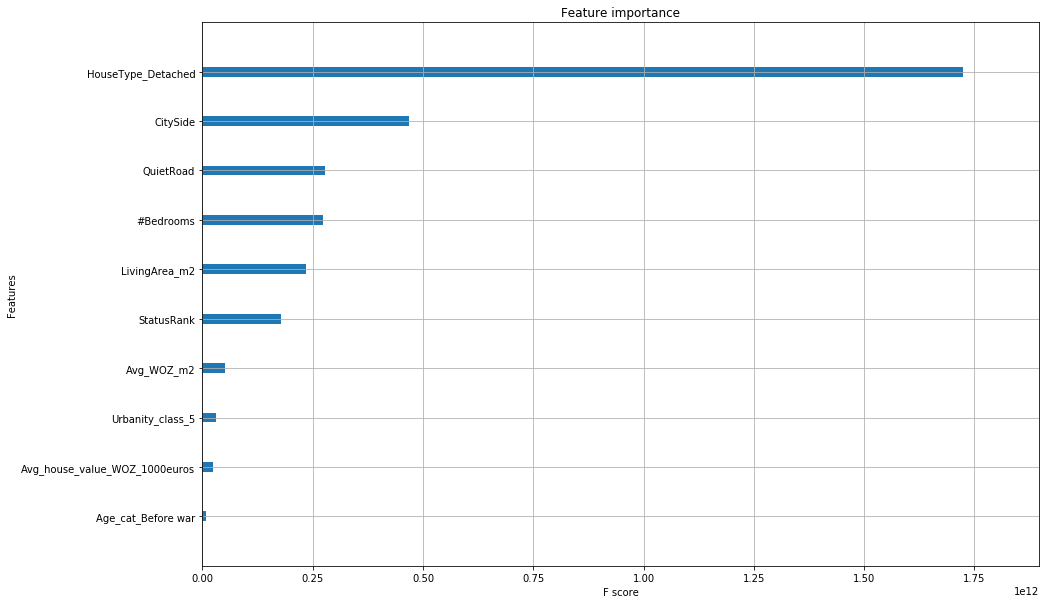

In [383]:
# b) Plot feature importances

fig, ax = plt.subplots(figsize=(15,10))
xgb.plot_importance(bst, importance_type='gain', show_values=False, ax=ax)

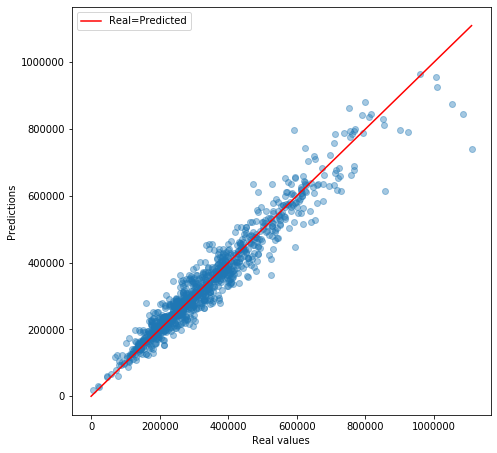

In [384]:
# c) Make predictions for the test set

y_test_pred = bst.predict(X_test)

plt.figure(figsize=(7.5,7.5))
plt.scatter(y_test, y_test_pred, alpha=0.4, marker='o')
plt.plot((0, max(y_test)), (0, max(y_test)), 'r-', label='Real=Predicted')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.legend(loc='upper left')

In [385]:
# d) Model evaluation for the test set
print("Bias: {}".format(np.mean(y_test_pred-y_test)))
print("R-squared: %.3f" % r2_score(y_test, y_test_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_pred))
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, y_test_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))

Bias: 84.0368057528409
R-squared: 0.936
Mean absolute error: 27235.28
Mean absolute percentage error: 8.99
Mean squared error: 1619249422.59


In [386]:
y_train_pred = bst.predict(X_train)
print("Bias: {}".format(np.mean(y_train_pred-y_train)))
print("R-squared: %.3f" % r2_score(y_train, y_train_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_train, y_train_pred))
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_train, y_train_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_train_pred))

Bias: -5.1147167664050315
R-squared: 0.963
Mean absolute error: 22467.21
Mean absolute percentage error: 7.52
Mean squared error: 991705957.99


# Assignment 4: Battle of the models

Time to battle it out! Does linear regression or XGBoost perform better? Do you have an idea why? What features are important in the model?

In [387]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

def mape(y, y_pred):
    mape = np.mean(np.abs((y-y_pred)/y))*100
    return mape

scoring = {'r2': 'r2', 'MAPE': make_scorer(mape)}

In [390]:
scores = cross_validate(bst, inputdata[X_variables], inputdata['Price'], scoring=scoring, cv=10, return_estimator=True)

In [391]:
scores

{'fit_time': array([0.13807583, 0.12678814, 0.1282289 , 0.12994599, 0.13077307,
        0.12843084, 0.13418198, 0.13332725, 0.14449   , 0.14017177]),
 'score_time': array([0.0020659 , 0.00204206, 0.00196719, 0.00260115, 0.00206113,
        0.00233221, 0.00211811, 0.00285077, 0.00203395, 0.00272512]),
 'estimator': (XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               importance_type='gain', learning_rate=0.3, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=80,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
               subsample=1, verbosity=1),
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               importance_type='gain', learning_rate=0.3, 